In [19]:
from astropy.table import Table
from SDSSutils.jpegs import jpegCreator as jc
import numpy as np
import cStringIO
import urllib
import Image
#from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def get_image_from_url(url):

    file = cStringIO.StringIO(urllib.urlopen(url).read())
    img = Image.open(file)
    return img

def show_jpegs(gals, image='location', criteria=None, randomize=False, 
               order_by=None):
    
    num = int(round(len(gals)/5)*5)
    if num < len(gals): num+=5
    
    num = 50
    rows = int(num/5)
 
    if randomize:
        #shuffle which galaxies get displayed     
        n_list=np.linspace(0,len(gals)-1,len(gals))
        random.seed(3)
        random.shuffle(n_list)

        #how many galaxies to display?
        random_n_list = n_list[0:num]

        gal_list = []
        for n in random_n_list:
            gal_list.append(gals[int(n)])
    else:
        gal_list = gals
    
    if len(gal_list) > num:
        gal_list = gal_list[:num]


    if order_by:
        try:
            gal_list.sort(order_by)
        except:
            print "{0} is not an option for sorting.".format(order_by)


    labels = np.linspace(1,num,num)
    v_align, h_align = ['bottom', 'top'], ['left','left']
    xy_coords = [(0.02, 0.02),(0.02, 0.97)]

    gs=gridspec.GridSpec(rows,5)
    gs.update(wspace=0.01)
    gs.update(hspace=0.01)

    f=plt.figure(figsize=(30,rows*7))
    n=0
    for i in range (0,rows):
        for j in range(0,5):
            
            ax=plt.subplot(gs[i,j])
            
            if n < num:
                gal = gal_list[n] 
            
                plt.imshow(get_image_from_url(gal[image]))
                plt.tick_params(labelbottom='off',labelleft='off')

                # Label each subject with a number in top right corner
                #ax.annotate('%s'%int(labels[n]),fontsize=38,xy=(0.97,0.97),
                #            xycoords='axes fraction', color='white',
                #            verticalalignment='top',horizontalalignment='right')

                for idx, crit in enumerate(criteria):

                    ax.annotate("$\mathrm{%s = %.4f}$"%(crit['label'], 
                                                      gal[crit['colname']]),
                                fontsize=38,xy=xy_coords[idx], color='white',
                                xycoords='axes fraction',
                                verticalalignment=v_align[idx], 
                                horizontalalignment=h_align[idx])
            
                ax.set_title(gal['OBJID'], fontsize=25)

                n+=1
                
            else:
                plt.tick_params(labelbottom='off',labelleft='off')

In [4]:
filename = "../../gzcodez/catalogs_GZ/zoo2MainSpecz_Ancillary.fits"
data = Table.read(filename)

In [5]:
small =  (data['PETROR50_R'] <= 3) &(data['PETROMAG_R']>=16)
print len(data[small])
tiny = data[small]

118224


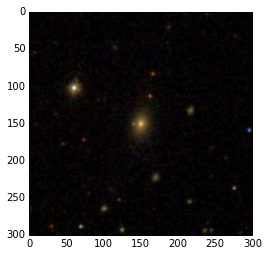

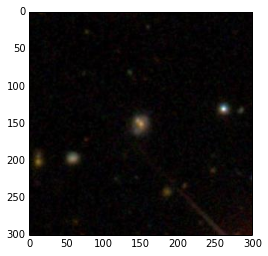

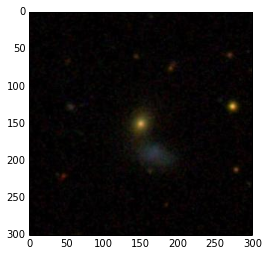

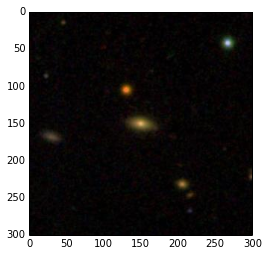

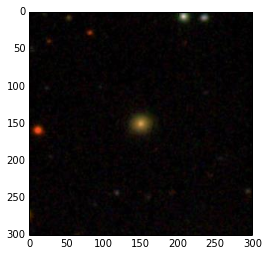

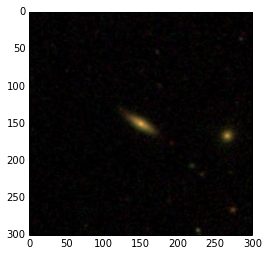

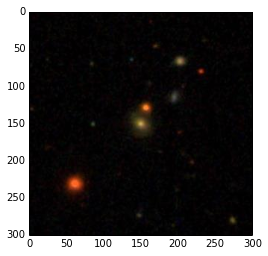

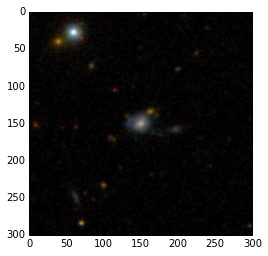

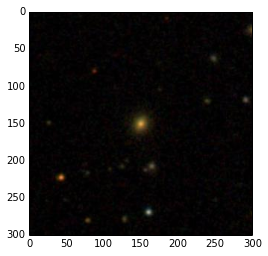

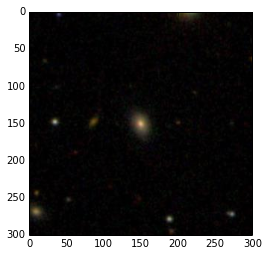

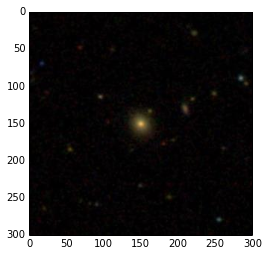

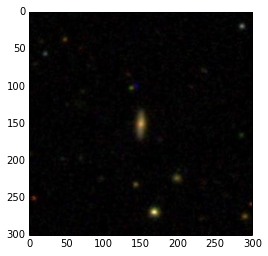

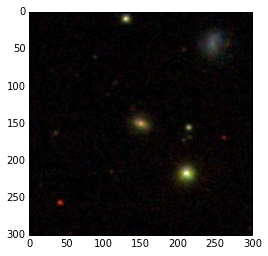

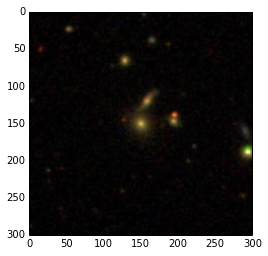

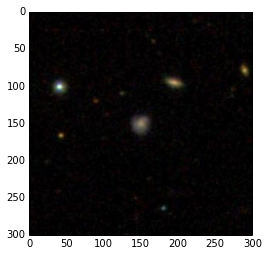

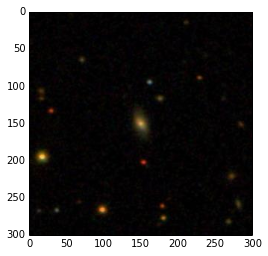

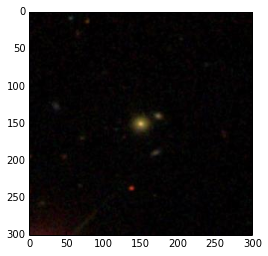

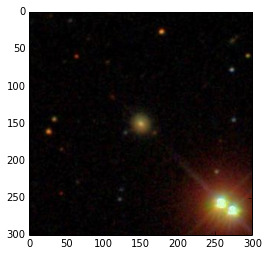

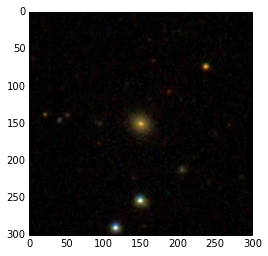

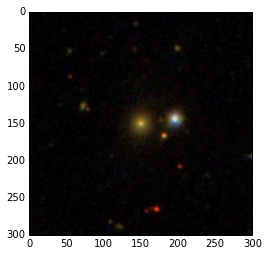

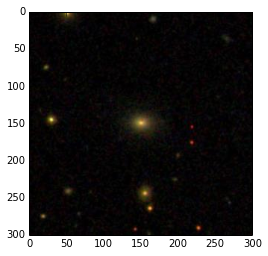

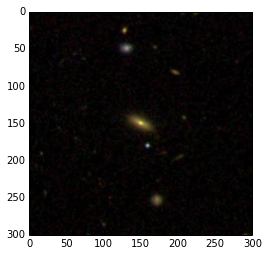

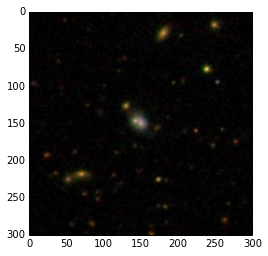

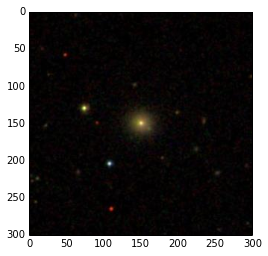

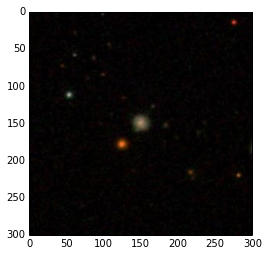

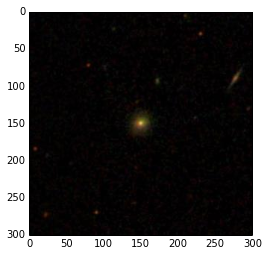

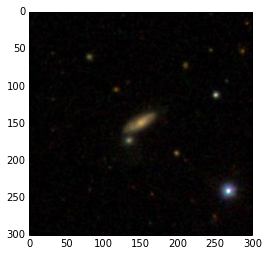

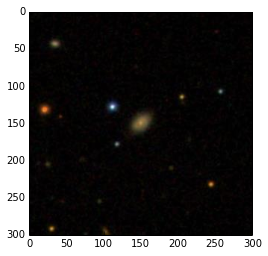

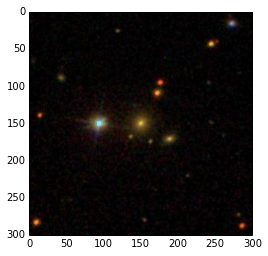

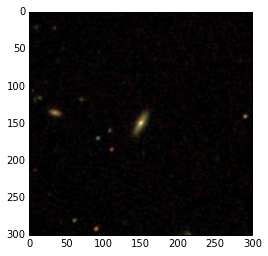

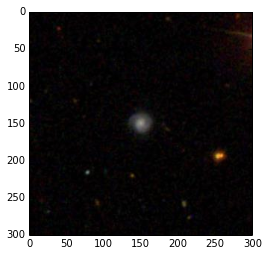

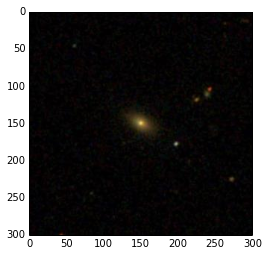

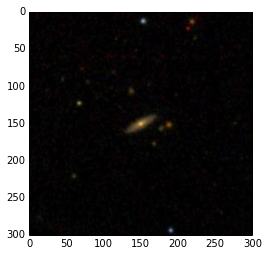

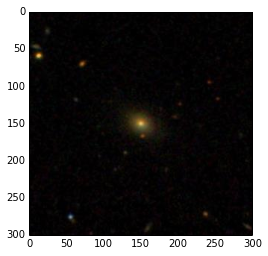

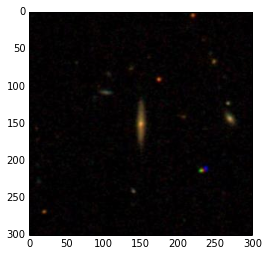

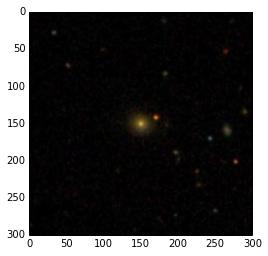

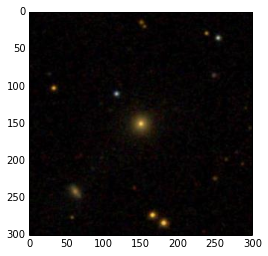

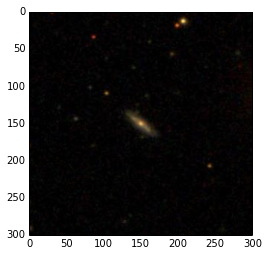

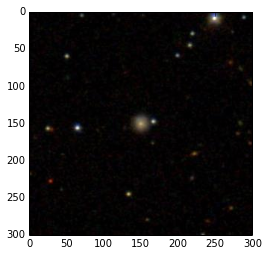

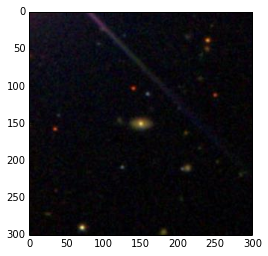

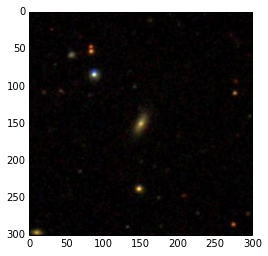

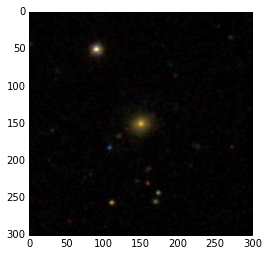

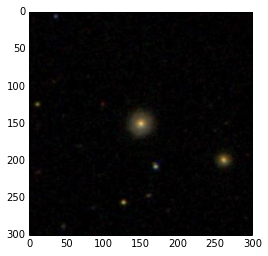

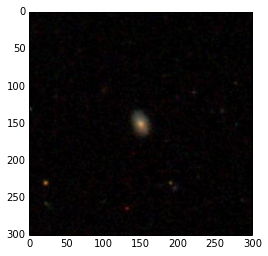

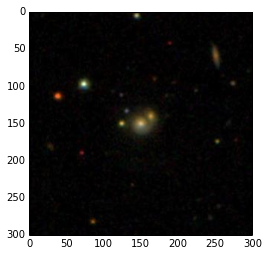

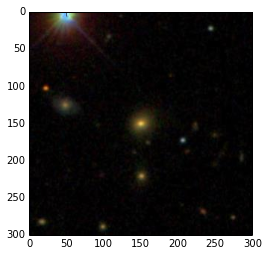

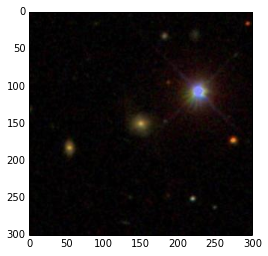

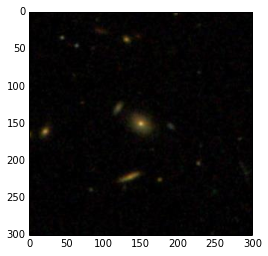

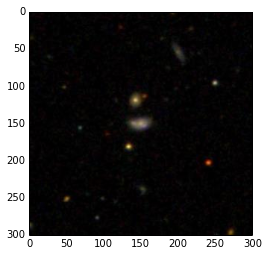

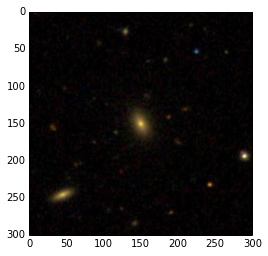

In [24]:
#show_jpegs(tiny, image='image_url', criteria='PETROR50_R', randomize=True)
for gal in tiny[:50]:
    jpg = jc.jpegURL(gal['RA'], gal['DEC'],height=300, width=300)
    img = get_image_from_url(jpg.createURL())
    plt.imshow(img)
    plt.show()